# Problem 4> Decision Tree

## 1. Load the dataset (2p)

In [1]:
import csv
import numpy as np

In [2]:
def load_data(d_train, d_test):
################################################################################
# TODO: Implement the function to load and preprocess the data                 #
# ** Make sure that the outputs of the function are the type of 'np.array'     #
#   - 'wine_feature' means the list of 11 attributes (except for 'quality')    #
#   - wine_feature = ['fixed acidity', 'volatile acidity', ... , 'alcohol']    #
################################################################################

    # Write your code here
    X_train = np.empty(shape = [0,11])
    Y_train = np.empty(shape = [0,1])
    wine_feature = []
    with open(d_train, 'r') as reader:
        flag = False
        for line in reader:
            if flag is False:
                #print("debug")
                features = line.split(',')
                wine_feature = features[:-1]
                flag = True
                continue
            linelist = line.split(',')
            #print(type(linelist))
            #print(len(linelist))
            X_train_new_row = np.array(linelist[:-1]).reshape([1,11])
            #print(X_train_row.shape)
            Y_train_new_row = np.array(linelist[-1]).reshape([1,1])
            #X_train = np.append(X_train,X_train_new_row)
            X_train = np.vstack([X_train,X_train_new_row])
            Y_train = np.append(Y_train,Y_train_new_row)
    
    X_test = np.empty(shape = [0,11])
    Y_test = np.empty(shape = [0,1])
    with open(d_test, 'r') as reader:
        flag = False

        for line in reader:
            if flag is False:
                #features = line.split(',')
                flag = True
                continue
            linelist = line.split(',')
            X_test_new_row = np.array(linelist[:-1]).reshape([1,11])
            Y_test_new_row = np.array(linelist[-1]).reshape([1,1])
            X_test = np.vstack([X_test,X_test_new_row])
            Y_test = np.append(Y_test,Y_test_new_row)

    return X_train, Y_train, X_test, Y_test, np.array(wine_feature)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [3]:
path = %pwd
# path for training data and test data
train_data = path + '/wine_train.csv'
test_data = path + '/wine_test.csv'

X_train, Y_train, X_test, Y_test, wine_feature = load_data(train_data, test_data)

# Sanity check
print('Training data shape: ', X_train.shape) # (434, 11)
print('Training labels shape: ', Y_train.shape) # (434, )
print('Test data shape: ', X_test.shape) # (109, 11)
print('Test labels shape: ', Y_test.shape) # (109, )
print('Feature shape: ', wine_feature.shape) # (11, )

Training data shape:  (434, 11)
Training labels shape:  (434,)
Test data shape:  (109, 11)
Test labels shape:  (109,)
Feature shape:  (11,)


## 2. Implement a decision tree (9p) 

In [4]:
from sklearn import tree

In [5]:
def calculate_accuracy(Y_test, Y_predict):
################################################################################
# TODO: Make a function for calculating the accuracy                           #
# ** Make sure that the output of the function is the type of 'float'          #
#   - This function should be work with test dataset                           #
################################################################################
    
    # Write your code here
    # count_nonzero fucntion : https://www.w3cschool.cn/doc_numpy_1_13/numpy_1_13-generated-numpy-count_nonzero.html
    # accurate rate = count(predicted Y == ground truth Y) / total number of predicted Y 
    accuracy = np.count_nonzero(Y_predict == Y_test)/Y_predict.shape[0] * 100
    return accuracy

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

In [6]:
################################################################################
# TODO: Implement/train/test a decision tree model                             #
#   - You don't need to show all the results                                   #
#   - If you use scikit-learn library, your code wouldn't be long              #   
################################################################################

# Write your code here
# description of sklean.tree.DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
classifier = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 0 )

# train and test your decision tree by changing the number of features, ranging from 2 to 11
NumOfFeatures = X_train.shape[1]
# dataset for plot 
X = []
Y = []
for i in range(2, NumOfFeatures + 1):
    # X_train[:, :i] # demension: all rows * (:i = 1 th ~ i th ) columns
    classifier.fit(X_train[:, :i], Y_train)
    Y_pred = classifier.predict(X_test[:, :i])
    acc = calculate_accuracy(Y_test, Y_pred)
    print("The number of features = {}\t accuracy = {:.3f}".format(i, acc))
    X.append(i)
    Y.append(acc)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

The number of features = 2	 accuracy = 47.706
The number of features = 3	 accuracy = 38.532
The number of features = 4	 accuracy = 48.624
The number of features = 5	 accuracy = 46.789
The number of features = 6	 accuracy = 55.046
The number of features = 7	 accuracy = 43.119
The number of features = 8	 accuracy = 49.541
The number of features = 9	 accuracy = 49.541
The number of features = 10	 accuracy = 44.037
The number of features = 11	 accuracy = 56.881


**Question #1:** Does using more features always improve results?

**Your Answer:** 
>  <br> Even though the more features are used for building classifier, the accuracy of the classifier is always not improved. 
<br> This is because bad features may be used when we build the classifier.

**Question #2:** Plot the accuracy (X-axis: # of features / Y-axis: accuracy)

**Your Answer:** Write your code to plot the graph at the below cell(see the below cell).

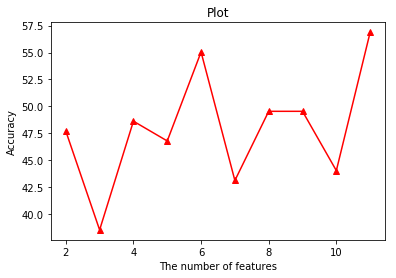

In [8]:
# Write your code here
# If you are unfamiliar with plotting a graph with python,
# you can refer to the following website.
# https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

import matplotlib.pylab as plt
plt.title("Plot")
plt.xlabel("The number of features")
plt.ylabel("Accuracy")
plt.plot(X, Y, color = 'r', marker = "^")
plt.show()

In [9]:
X.clear()
Y.clear()

## 3. What kind of wine is a good one? (9p) 

Choose the most 4 critical attributes that can determine the quality of wines. Aside from problem 4-(2), you should design and show additional experimental results to support your choice
<br> from problem 2 ... 

In [10]:
Top4list = []
for i in range(NumOfFeatures):
    # X_train[:, i] # demension: all rows * i th columns
    
    classifier.fit(X_train[:, i].reshape(-1,1), Y_train)
    Y_pred = classifier.predict(X_test[:, i].reshape(-1,1))
    acc = calculate_accuracy(Y_test, Y_pred)
    print("The index of features = {}\t accuracy = {:.3f}".format(i, acc))
    X.append(i)
    Y.append(acc)
    Top4list.append((i,acc))

print(type(Top4list))
print(type(Top4list[0]))

# https://docs.python.org/3/howto/sorting.html
from operator import itemgetter
Top4list = sorted(Top4list, key = itemgetter(1), reverse = True)[:4]
Top4feature = []
for idx, acc in Top4list:
#     print(idx, acc)
    Top4feature.append(wine_feature[idx])
print(Top4feature)
print(acc)

The index of features = 0	 accuracy = 33.945
The index of features = 1	 accuracy = 41.284
The index of features = 2	 accuracy = 35.780
The index of features = 3	 accuracy = 39.450
The index of features = 4	 accuracy = 35.780
The index of features = 5	 accuracy = 48.624
The index of features = 6	 accuracy = 39.450
The index of features = 7	 accuracy = 44.954
The index of features = 8	 accuracy = 38.532
The index of features = 9	 accuracy = 33.028
The index of features = 10	 accuracy = 42.202
<class 'list'>
<class 'tuple'>
['free sulfur dioxide', 'density', 'alcohol', 'volatile acidity']
41.284403669724774


In [11]:
# To solve question #2, you can utilize the 'vis_tree' function.
# 'vis_tree function' visualize the structure of your decision tree

In [12]:
# Put 'vis_tree.py' in the same directory
from vis_tree import vis_tree
# Write just one line as follows:
# classifier = scikit-learn's decision tree
classifier.fit(X_train, Y_train)
# wine_feature = 5th output from 'load_data' funtion above
vis_tree(classifier, wine_feature)

The binary tree structure has 157 nodes and has the following tree structure:
node=0 test node: go to node 1 if alcohol <= 10.849999904632568 else to node 90.
	node=1 test node: go to node 2 if volatile acidity <= 0.2849999964237213 else to node 67.
		node=2 test node: go to node 3 if alcohol <= 8.949999809265137 else to node 8.
			node=3 test node: go to node 4 if volatile acidity <= 0.21249999850988388 else to node 5.
				node=4 leaf node.
				node=5 test node: go to node 6 if chlorides <= 0.05649999901652336 else to node 7.
					node=6 leaf node.
					node=7 leaf node.
			node=8 test node: go to node 9 if alcohol <= 10.349999904632568 else to node 46.
				node=9 test node: go to node 10 if free sulfur dioxide <= 40.5 else to node 29.
					node=10 test node: go to node 11 if fixed acidity <= 6.8500001430511475 else to node 18.
						node=11 test node: go to node 12 if total sulfur dioxide <= 186.0 else to node 17.
							node=12 test node: go to node 13 if volatile acidity <= 0.27500

I used four tops as a feature from the root node of the decision three.

In [13]:
print(wine_feature)
classifier.fit(X_train[:, [1,5,8,10]], Y_train)
Y_pred = classifier.predict(X_test[:, [1,5,8,10]])
acc = calculate_accuracy(Y_test, Y_pred)
acc

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


50.45871559633027

In [14]:
from itertools import combinations
temp_array = list(combinations(list(range(11)), 4)) # combination list 

max_accuracy = 0
max_index = 0
#print(temp_array[0])
for i in range(len(temp_array)):
    classifier.fit(X_train[:,list(temp_array[i])], Y_train)
    temp_predict  = classifier.predict(X_test[:,list(temp_array[i])])
    temp_accuracy = calculate_accuracy(Y_test, temp_predict)
    if temp_accuracy > max_accuracy:
        max_index = i
        max_accuracy = temp_accuracy
print("among ",len(temp_array),"combination, ",max_index, "idex is the best 4 features" )
print(temp_array[max_index])

Top4feature = []
for idx in list(temp_array[max_index]):
    Top4feature.append(wine_feature[idx])
print(Top4feature)
print("accuracy is ",max_accuracy)

among  330 combination,  70 idex is the best 4 features
(0, 3, 5, 6)
['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
accuracy is  65.13761467889908


**Question #1 :** List the most 4 critical attributes you think in order.

**Your Answer:** 
<br> 
> See the below a list in the cell 

In [15]:
Top4feature

['fixed acidity',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide']

**Question #2 :** How do you get to that conclusion? You should briefly explain the reason demonstrating your experimental results.

**Your Answer:**

> <br> 
- First of all, I build decision tree from only one feature, and then I choose top 4 features with good accuracy. 
<br> the features are ['free sulfur dioxide', 'density', 'alcohol', 'volatile acidity']
<br> the accuracy is 41%
<br> 
- Secondly, I used four tops as a feature from the root node of the decision three(see the result of vis_tree).
<br> the features are ['free sulfur dioxide', 'pH', 'alcohol', 'volatile acidity']
<br> the accuracy is 50%
<br> 
- Finally, among  330 combination, the best 4 features are chosen from the naive approach.
<br> the features are ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
<br> the accuracy is 65%
